In [1]:
%matplotlib inline

# SYDE 522 Assignment 1
## Perceptrons and Regression

### Due: Monday Sept 25 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


### Question 1: Implementing a Perceptron

The following code generates the same data that was used to demonstrate the Perceptron in class:

In [140]:
import sklearn.datasets
data_x, data_y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                             cluster_std=[0.3, 1.5], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)

This produces two arrays, `data_x` which contains the input data (200 rows, each of which has 2 values $x_1$ and $x_2$), and `data_y` which contains the desired output data (either a 1 or a 0).

Implement a Perceptron to learn a classifier on this data.  It should learn three values: $\omega_1$, $\omega_2$, and $\theta$ (of course you can use whatever variable names you like to encode them).  You can treat $\theta$ separately, or you can consider it an extra weight variable $\omega_0$ and have an extra input that is always 1.  Implement this Perceptron yourself, rather than using the `sklearn.linear_model.Perceptron` implementation that we will use in Question 2.

Initialize the weights to $\omega_1=1; \omega_2=-1; \theta=0$.  

**a) [1 mark]** Before doing any training, plot the data as a scatterplot and colour the dots such that the data points for which the model outputs a 1 are blue and the ones for which the model outputs a 0 are red.  This can be done with the following code, if `y` is the list of outputs from your model.  Compute how accurate the model is (i.e. what percentage of the time the model outputs the correct value) and report that number.

In [204]:
import numpy as np

# extract features as column vectors and create X matrix
x1 = data_x[:,0]
x2 = data_x[:,1]
x3 = np.ones_like(x1)
X = np.column_stack((x1, x2, x3))

# initialize weights and bias
W = np.array([1.0, -1.0, 0.0])

def perceptron(X, W):
    weighted_sum = np.dot(X, W)
    y = [int(sum > 0) for sum in weighted_sum] # model outputs
    return y

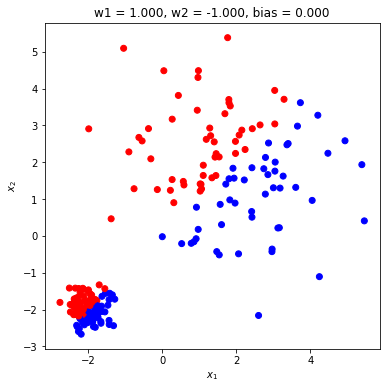

In [205]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(data_x, y):
    plt.figure(figsize=(6,6))
    plt.scatter(data_x[:,0], data_x[:,1], c=np.where(y, 'blue', 'red'))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'w1 = {W[0]:.3f}, w2 = {W[1]:.3f}, bias = {W[2]:.3f}')
    plt.show()

y = perceptron(X, W)
plot_predictions(data_x, y)

In [206]:
# calculate accuracy
accuracy = np.mean(y == data_y) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 51.50%


**b) [1 mark]** Train the model by going through each of the 200 elements in the data set in order once.  For each input, check if the output is correct.  If it is not correct, apply the Perceptron Learning Rule.   Use a learning rate of 0.1.

Now produce the same plot as in part a), but with your trained weights.  How accurate is the model now?  Report the $\omega$ and $\theta$ values.

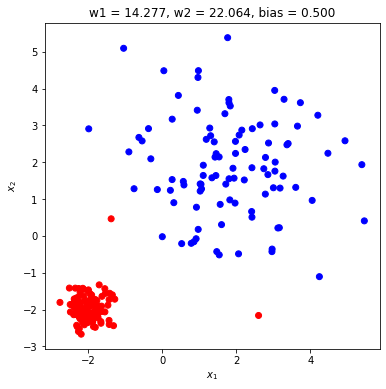

In [207]:
# training with learning rate = 0.1
learning_rate = 0.1

def update_weights(X, W, pred, target, learning_rate):
    for i in range(len(pred)):
        if pred[i] != target[i]:
            for j in range(X.shape[1]):
                W[j] += learning_rate*X[i,j]*(target[i] - pred[i]) # should be negative if prediction exceeds target
    return W

W = update_weights(X, W, y, data_y, learning_rate)
y = perceptron(X, W) # build perceptron with new weights
plot_predictions(data_x, y)

In [209]:
# calculate accuracy
accuracy = np.mean(y == data_y) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 99.00%


**c) [1 mark]** Repeat the training in part b) enough times that the model is perfect (in that it correctly classifies all the inputs).  How many repetitions does this take?  Produce the same plots as in part a) and b), but with your new weights.  Report the $\omega$ and $\theta$ values.

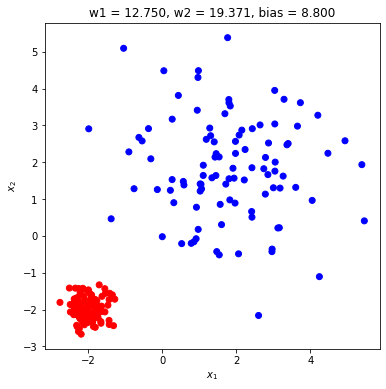

Repetitions = 59


In [210]:
count = 1
while any(y[i] != data_y[i] for i in range(len(y))):
    count += 1
    W = update_weights(X, W, y, data_y, learning_rate)
    y = perceptron(X, W) # build perceptron with new weights
    
plot_predictions(data_x, y)
print(f"Repetitions = {count}")

**d) [1 mark]** Create a new Perceptron identical to the above one, but with a learning rate of 1.0.  Train this model until it reaches 100% accuracy.  How many repetitions does this take?  Produce the same plot again, but with your new weights.  Report the $\omega$ and $\theta$ values.

Now do the same thing with a learning rate of 0.01, and then again with a learning rate of 100.

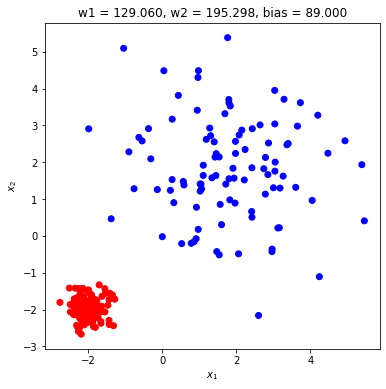

Repetitions = 57


In [211]:
# re-initialize weights and bias
W = np.array([1.0, -1.0, 0.0])

y = perceptron(X, W)
learning_rate = 1.0

count = 0
while any(y[i] != data_y[i] for i in range(len(y))):
    count += 1
    W = update_weights(X, W, y, data_y, learning_rate)
    y = perceptron(X, W) # build perceptron with new weights

plot_predictions(data_x, y)    
print(f"Repetitions = {count}")

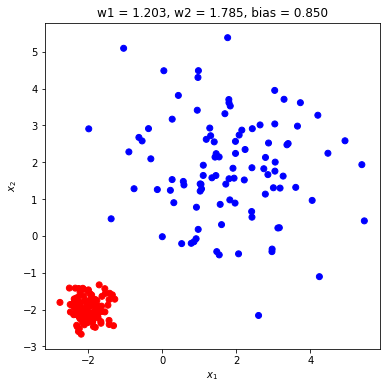

Repetitions = 76


In [212]:
# re-initialize weights and bias
W = np.array([1.0, -1.0, 0.0])

y = perceptron(X, W)
learning_rate = 0.01

count = 0
while any(y[i] != data_y[i] for i in range(len(y))):
    count += 1
    W = update_weights(X, W, y, data_y, learning_rate)
    y = perceptron(X, W) # build perceptron with new weights

plot_predictions(data_x, y)    
print(f"Repetitions = {count}")

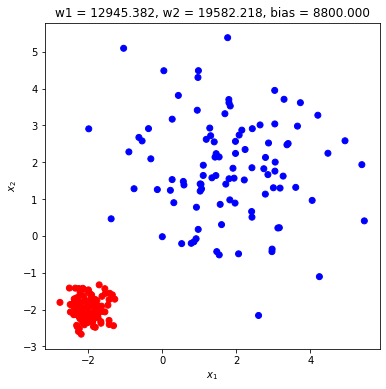

Repetitions = 56


In [213]:
# re-initialize weights and bias
W = np.array([1.0, -1.0, 0.0])

y = perceptron(X, W)
learning_rate = 100

count = 0
while any(y[i] != data_y[i] for i in range(len(y))):
    count += 1
    W = update_weights(X, W, y, data_y, learning_rate)
    y = perceptron(X, W) # build perceptron with new weights

plot_predictions(data_x, y)    
print(f"Repetitions = {count}")

### Question 2:

We will now try a more complex dataset, and use a pre-written implementation of the Perceptron.  The `sklearn` Python library https://scikit-learn.org/ has a large collection of machine learning algorithms, and comes with a variety of datasets.  It comes pre-installed with Anaconda or can be installed with `pip install scikit-learn`.

The dataset we will use is the UCI ML hand-written digits dataset https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

It is available with the following command:

In [214]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()

The inputs are 64 values, representing an 8x8 input image that is a low-resolution handwritten digit.  You can access this data as `digits.data`.  The correct label (i.e. the desired output) for each digit is accessed with `digits.target`.  Here are the first four input-output pairs:

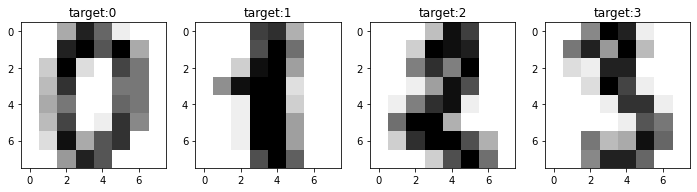

In [215]:
plt.figure(figsize=(12,3))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray_r')
    plt.title(f'target:{digits.target[i]}')
plt.show()

You can create a Perceptron using the following command, where `eta0` is the learning rate:

In [216]:
import sklearn.linear_model
perceptron = sklearn.linear_model.Perceptron(eta0=1.0)

If you have an input data `X` and target output data `Y`, you can train the perceptron as follows:

In [ ]:
perceptron.fit(X, Y)

Once the Perceptron has been trained, you can see what outputs it actually generates given input `X` as follows:

In [ ]:
perceptron.predict(X)

In addition, `sklearn` provides a useful tool for separating your data into training and test data.

In [217]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True,
)

This splits all your data in `digits.data` into two parts, `X_train` and `X_test` (with the corresponding outputs in `Y_train` and `Y_test`).  The setting `test_size=0.2` means that the test set will be 20% of the data, and `shuffle=True` means it will randomly choose that 20%.

Note that you can also use the same function to split your training data into training data and validation data.

**a) [1 mark]** Let's start with only considering the digit data for 0's and 1's.  We can extract just that data with `X = digits.data[(digits.target == 0) | (digits.target == 1)]` and `Y = digits.target[(digits.target == 0) | (digits.target == 1)]`.  Split the data into 80% training and 20% testing.  Create a Perceptron with a learning rate of 1.0 and train it on your training data.  Report the accuracy (i.e. how often the model gives the correct output) on your testing data.

In [219]:
import sklearn.datasets
import sklearn.model_selection
import sklearn.linear_model
digits = sklearn.datasets.load_digits()

X = digits.data[(digits.target == 0) | (digits.target == 1)]
Y = digits.target[(digits.target == 0) | (digits.target == 1)]

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.2, shuffle=True,
)

# create perceptron with learning rate of 1.0
perceptron = sklearn.linear_model.Perceptron(eta0=1.0)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)

# calculate accuracy
accuracy = np.mean(Y_pred == Y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 97.22%


**b) [1 mark]** Repeat the above, but with the entire data set (i.e. all 10 digits).  Report the accuracy.  How does the accuracy change as you adjust the learning rate?  Make a plot that shows this.

In [220]:
# all 10 digits!!!
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True,
)

# create perceptron with learning rate of 1.0
perceptron = sklearn.linear_model.Perceptron(eta0=1.0)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)

# calculate accuracy
accuracy = np.mean(Y_pred == Y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 92.50%


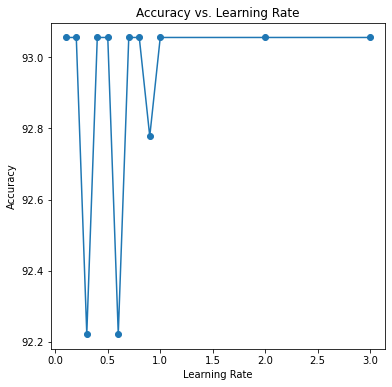

In [151]:
# plotting change in accuracy with learning rate
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0]
accuracies = []

for rate in learning_rates:
    perceptron = sklearn.linear_model.Perceptron(eta0=rate)
    perceptron.fit(X_train, Y_train)
    Y_pred = perceptron.predict(X_test)
    
    accuracy = np.mean(Y_pred == Y_test) * 100
    accuracies.append(accuracy)

# plotting accuracy vs learning rate
plt.figure(figsize=(6,6))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-')

# labels
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate')

plt.show()

**c) [1 mark]** What mistakes does the model make?  What digits does it tend to mistake for other digits?  Use the `plt.imshow(digits.data[i].reshape(8,8), cmap='gray_r')` command given above to plot some of the digits that it gets wrong.  Why do you think it has problems with these digits?

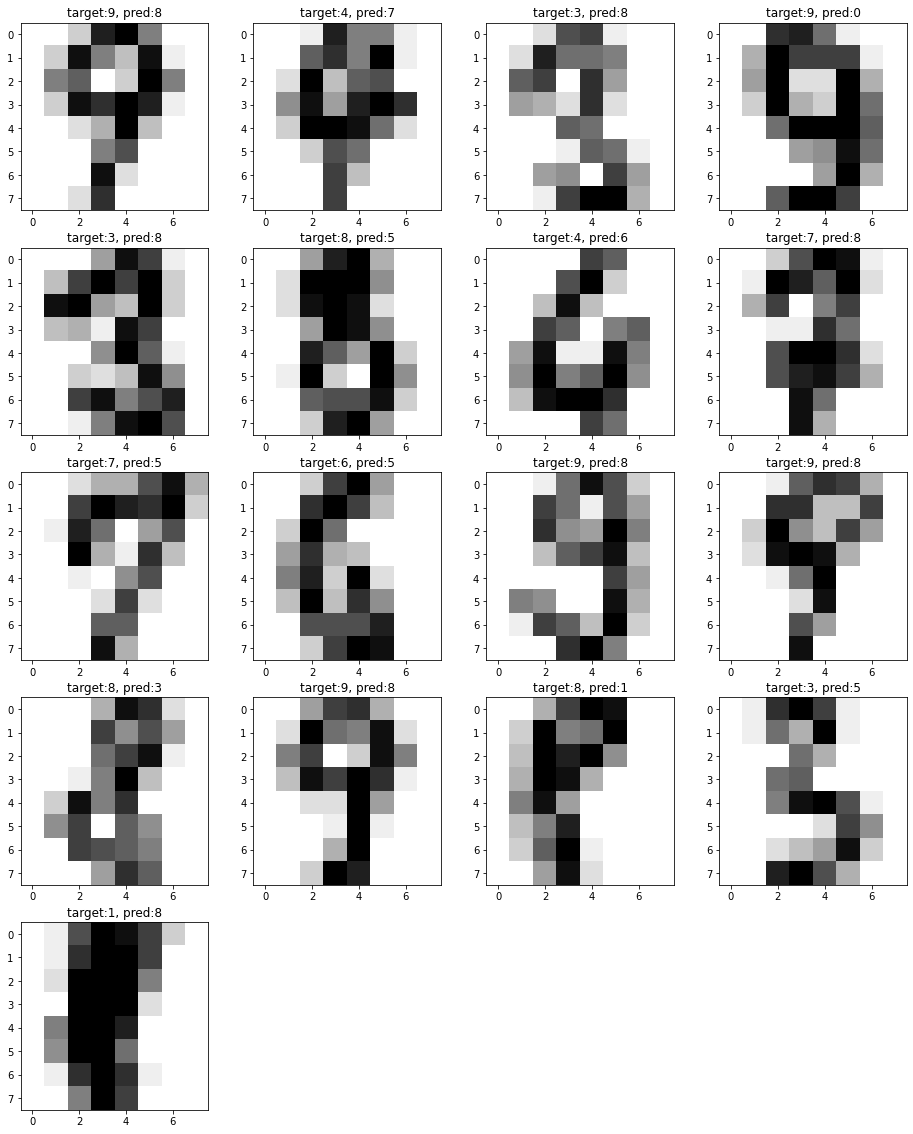

In [149]:
error_indices = [i for i in range(len(Y_pred)) if Y_pred[i] != Y_test[i]]
error_input = [X_test[i] for i in error_indices]
error_output = [Y_test[i] for i in error_indices]
error_pred = [Y_pred[i] for i in error_indices]

# subplot for each error
num_errors = len(error_indices)
num_columns = 4 
num_rows = (num_errors + num_columns - 1) // num_columns  # calculate the number of rows needed

plt.figure(figsize=(16, 20))

for i, error_index in enumerate(error_indices):
    plt.subplot(num_rows, num_columns, i+1)
    plt.imshow(error_input[i].reshape(8,8), cmap='gray_r')
    plt.title(f'target:{error_output[i]}, pred:{error_pred[i]}')
plt.show()

The model commonly misclassifies non-'8' digits as '8', and frequently misclassifies '9' as other digits. 

Upon visual inspection of the misclassified samples, this seems reasonable as the resolution of the digits is very low. Many non-'8' samples look similar to '8' samples, and there is a considerable amount of variation in the '9' digits, resulting in their misclassification.

### Question 3:

The following code generates the same data that was used to demonstrate curve fitting in class.  `train_x` and `train_y` are the 10 data points we use for doing the curve fitting, and `test_x` and `test_y` are the data we used to test how well the fit generalizes.

In [223]:
import numpy as np
rng = np.random.RandomState(seed=0)
train_x = np.linspace(0, 1, 10)
train_y = np.sin(train_x*2*np.pi) + rng.normal(0,0.1,size=10)
test_x = np.linspace(0, 1, 500)
test_y = np.sin(test_x*2*np.pi)

**a) [1 mark]** Find the weights that best fit this data using linear regression.  This should generate two weights: one that is multiplied by the input value and one that is mulitplied by the feature that is constantly a 1.  Implement this yourself, rather than using the `sklearn.linear_model.LinearRegression` implementation that we will use in Question 4.  To invert the matrix, use `np.linalg.pinv`.  

Plot the training data, the ideal testing output, and the actual testing output.  Report the weights found by regression.  Compute and report the Root Mean Squared Error (`np.sqrt(np.mean((Y-output)**2))` where `Y` is the vector of desired outputs and `output` is the vector of the actual outputs from the model) for both the training data and the testing data.

In [224]:
# matrix math
train_x_augmented = np.column_stack((train_x, np.ones_like(train_x)))
train_x_gram = np.dot(train_x_augmented.T, train_x_augmented)
train_x_gram_inv = np.linalg.pinv(train_x_gram)

# computing weights
weights = np.matmul(train_x_gram_inv, np.matmul(train_x_augmented.T, train_y))

# applying linear regression on testing and testing data
train_output = np.dot(train_x_augmented, weights)

test_x_augmented = np.column_stack((test_x, np.ones_like(test_x)))
test_output = np.dot(test_x_augmented, weights)

print(f"Weights: {weights}")

Weights: [-1.50188406  0.82474435]


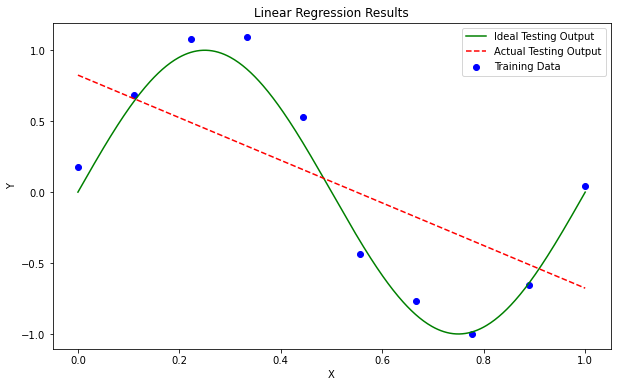

In [95]:
# plotting results
plt.figure(figsize=(10, 6))

# plot the training data points
plt.scatter(train_x, train_y, color='blue', label='Training Data', marker='o')

# plot the ideal testing output
plt.plot(test_x, test_y, color='green', label='Ideal Testing Output', linestyle='-')

# plot the actual testing output
plt.plot(test_x, test_output, color='red', label='Actual Testing Output', linestyle='--')

# add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Results')
plt.legend()

plt.show()

In [96]:
# calculating rmse
train_rmse = np.sqrt(np.mean((train_y-train_output)**2)) 
test_rmse = np.sqrt(np.mean((test_y-test_output)**2))

print(f"Root mean squared error (training): {train_rmse}")
print(f"Root mean squared error (testing): {test_rmse}")

Root mean squared error (training): 0.5478656176519362
Root mean squared error (testing): 0.46483262950123677


**b) [1 mark]** Repeat part a), but use the first 5 polynomials as features ($x^0, x^1, x^2, x^3, x^4$).  Plot the training data, the ideal testing output, and the actual testing output.  Report the weights found by regression.  Compute and report the Root Mean Squared Error for both the training data and the testing data.  Do not use regularization.

In [225]:
# generate polynomial features (x^0, x^1, x^2, x^3, x^4) for both training and testing data
# note: these matrices automatically have a column of 1s
degree = 4
train_x_poly = np.column_stack([train_x**i for i in range(degree + 1)])
test_x_poly = np.column_stack([test_x**i for i in range(degree + 1)])

# matrix math
train_x_gram = np.dot(train_x_poly.T, train_x_poly)
train_x_gram_inv = np.linalg.pinv(train_x_gram)

# computing weights
weights = np.matmul(train_x_gram_inv, np.matmul(train_x_poly.T, train_y))

# applying linear regression on training and testing data
train_output = np.dot(train_x_poly, weights)
test_output = np.dot(test_x_poly, weights)

print(f"Weights: {weights}")

Weights: [  0.09121908   9.97654202 -27.72073974  13.5425296    4.2194939 ]


In [98]:
# calculating rmse
train_rmse = np.sqrt(np.mean((train_y-train_output)**2)) 
test_rmse = np.sqrt(np.mean((test_y-test_output)**2))

print(f"Root mean squared error - training: {train_rmse}")
print(f"Root mean squared error - testing: {test_rmse}")

Root mean squared error - training: 0.13652971934310235
Root mean squared error - testing: 0.12757359049533437


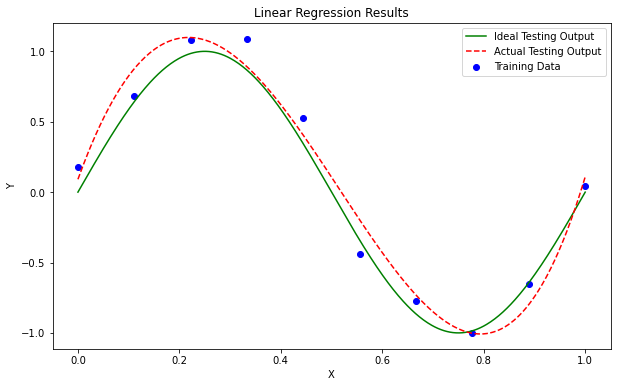

In [99]:
# plotting results
plt.figure(figsize=(10, 6))

# plot the training data points
plt.scatter(train_x, train_y, color='blue', label='Training Data', marker='o')

# plot the ideal testing output
plt.plot(test_x, test_y, color='green', label='Ideal Testing Output', linestyle='-')

# plot the actual testing output
plt.plot(test_x, test_output, color='red', label='Actual Testing Output', linestyle='--')

# add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Results')
plt.legend()

plt.show()

**c) [1 mark]** Vary the number of polynomials you use from 1 up to 15.  Compute the Root Mean Squared Error for the training and testing data and plot the results.

In [226]:
# generate 15 polynomial features 
# note: these matrices automatically have a column of 1s
degree = 14
train_x_poly = np.column_stack([train_x**i for i in range(degree + 1)])
test_x_poly = np.column_stack([test_x**i for i in range(degree + 1)])

# matrix math
train_x_gram = np.dot(train_x_poly.T, train_x_poly)
train_x_gram_inv = np.linalg.pinv(train_x_gram)

# computing weights
weights = np.matmul(train_x_gram_inv, np.matmul(train_x_poly.T, train_y))

# applying linear regression on test data
train_output = np.dot(train_x_poly, weights)
test_output = np.dot(test_x_poly, weights)

print(f"Weights: {weights}")

Weights: [ 1.76405238e-01 -2.72649007e+00  1.51248568e+02 -1.11463161e+03
  3.64742386e+03 -5.06970632e+03  5.89682209e+00  4.54279412e+03
  1.78899566e+03 -3.10339399e+03 -4.26698682e+03 -7.70044461e+02
  3.87915781e+03  4.38177665e+03 -4.06993914e+03]


In [227]:
# calculating rmse
train_rmse = np.sqrt(np.mean((train_y-train_output)**2)) 
test_rmse = np.sqrt(np.mean((test_y-test_output)**2))

print(f"Root mean squared error (training): {train_rmse}")
print(f"Root mean squared error (testing): {test_rmse}")

Root mean squared error (training): 1.0274069127306692e-06
Root mean squared error (testing): 0.6099693453241359


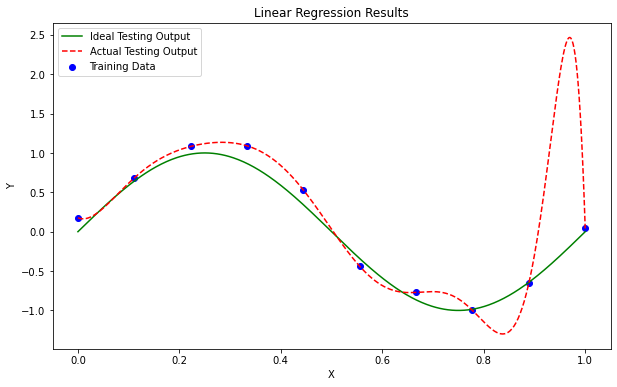

In [103]:
# plotting results
plt.figure(figsize=(10, 6))

# plot the training data points
plt.scatter(train_x, train_y, color='blue', label='Training Data', marker='o')

# plot the ideal testing output
plt.plot(test_x, test_y, color='green', label='Ideal Testing Output', linestyle='-')

# plot the actual testing output
plt.plot(test_x, test_output, color='red', label='Actual Testing Output', linestyle='--')

# add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Results')
plt.legend()

plt.show()

**d) [1 mark]** Now intruduce regularization to your model.  Set the number of polynomials to 10 and vary the amount of regularization.  Use `lambds = np.exp(np.linspace(-50,-1, 50))` to generate the list of 50 different regularization values to try (logarithmically spaces between $e^{-50}$ and $e^{-1}$).  Compute the Root Mean Squared Error for the training and testing data and plot the results.  Note that `plt.semilogx` lets you create a plot where the x-axis is on a log scale, like the version of this plot we saw in class.

In [104]:
# generate 10 polynomial features 
# note: these matrices automatically have a column of 1s
degree = 10
train_x_poly = np.column_stack([train_x**i for i in range(degree + 1)])
test_x_poly = np.column_stack([test_x**i for i in range(degree + 1)])

train_rmse = []
test_rmse = []

# matrix math
train_x_gram = np.dot(train_x_poly.T, train_x_poly)
lambds = np.exp(np.linspace(-50,-1,50))

for lambd in lambds:
    temp = np.add(train_x_gram, lambd*np.identity(len(train_x_gram)))
    temp_inv = np.linalg.pinv(temp)
    
    # computing weights
    weights = np.matmul(temp_inv, np.matmul(train_x_poly.T, train_y))
    
    # applying linear regression on training and testing data
    train_output = np.dot(train_x_poly, weights)
    rmse = np.sqrt(np.mean((train_y-train_output)**2)) 
    train_rmse.append(rmse)
    
    test_output = np.dot(test_x_poly, weights)
    rmse = np.sqrt(np.mean((test_y-test_output)**2)) 
    test_rmse.append(rmse)

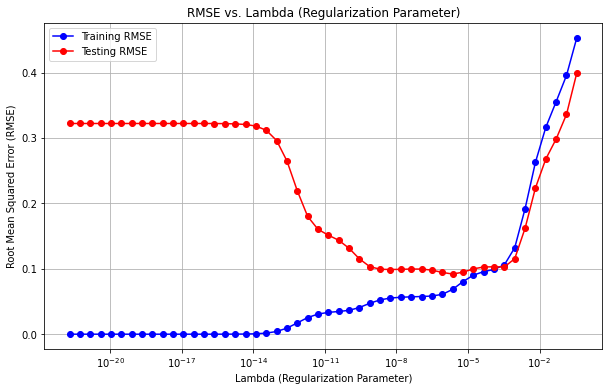

In [105]:
# plotting RMSE vs. Lambda on a log scale
plt.figure(figsize=(10, 6))
plt.semilogx(lambds, train_rmse, label='Training RMSE', marker='o', linestyle='-', color='blue')
plt.semilogx(lambds, test_rmse, label='Testing RMSE', marker='o', linestyle='-', color='red')

# add labels and legend
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs. Lambda (Regularization Parameter)')
plt.legend()

plt.grid(True)
plt.show()

### Question 4:

We will now use the regression tool built in to `sklearn`.  We create it as follows.  Note that it is called `Ridge` due to how regularization is implemented: we add a value onto the diagonal of the matrix being inverted.  You can think of this as adding a diagonal ridge to whatever data is in the matrix.  For this reason, this is often called "ridge regression".  The parameter `alpha` sets the amount of regression (it is the same as what we called $\lambda$ in class).

In [228]:
import sklearn.linear_model
reg = sklearn.linear_model.Ridge(alpha=0.000001)

We use the regression system using exactly the same functions as the Perceptron.  Here we train it using `X` and `Y`, and then determine what the outputs are given `X`.

In [107]:
reg.fit(X, Y)
output = reg.predict(X)

For data, we are going to use the Diabetes dataset from https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html which is also built in to `sklearn`.  You can load this data set using

In [229]:
diabetes = sklearn.datasets.load_diabetes()

As with the digits dataset, you can access the `X` values with `diabetes.data` and the `Y` values with `diabetes.target`.  See https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset for an explanation of what the different data values mean.

**a) [1 mark]** Split the data evenly into three parts: 1/3rd training, 1/3rd validation, and 1/3rd testing.  This will involve calling `sklearn.model_selection.train_test_split` twice.  Train the model using various different amounts of regularization from $e^{-20)$ to $e^5$ (`lambds = np.exp(np.linspace(-20,5,50))`).  Compute the Root Mean Squared Error on the training and validation datasets and plot how this error changes for different amounts of regularization.  Using these results, pick a good value for regularization and then apply this to your testing data.  Report the Root Mean Squared Error for the testing data.

In [230]:
X = diabetes.data
Y = diabetes.target

# split into testing and training
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=1/3, shuffle=True
)

# split training into training and validation
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(
    X_train, Y_train, test_size=1/2, shuffle=True
)

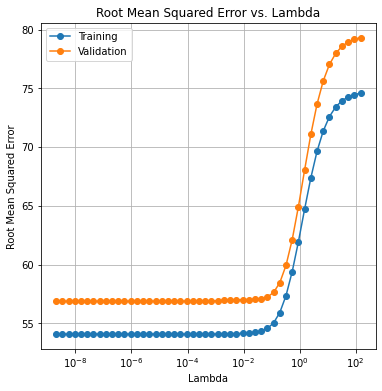

In [138]:
import sklearn.linear_model
lambds = np.exp(np.linspace(-20,5,50))
training_rmse = []
validation_rmse = []

for lambd in lambds:
    reg = sklearn.linear_model.Ridge(alpha=lambd)
    reg.fit(X_train, Y_train) # train on training data
    
    output = reg.predict(X_train) # test on training data
    error = np.sqrt(np.mean((Y_train-output)**2)) # compute root mean squared error
    training_rmse.append(error)
    
    output = reg.predict(X_validation) # test on validation data
    error = np.sqrt(np.mean((Y_validation-output)**2)) # compute root mean squared error
    validation_rmse.append(error)

# plotting rmse vs lambda
plt.figure(figsize=(6,6))
plt.semilogx(lambds, training_rmse, label='Training', marker='o', linestyle='-')
plt.semilogx(lambds, validation_rmse, label='Validation', marker='o', linestyle='-')

# labels
plt.xlabel('Lambda')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error vs. Lambda')
plt.legend()

plt.grid(True)
plt.show()

In [234]:
lambd = np.exp(-1)
reg = sklearn.linear_model.Ridge(alpha=lambd)
reg.fit(X_train, Y_train) # train on training data
output = reg.predict(X_test) # test on testing data
error = np.sqrt(np.mean((Y_test-output)**2)) # compute root mean squared error

print(f"Regularization: {np.exp(-1)}")
print(f"Root mean squared error (testing): {error}")

Regularization: 0.36787944117144233
Root mean squared error (testing): 59.1200123273266


**b) [1 mark]** How consistent is this result?  That is, if you redo part a) but with a different randomly chosen split in the data, do you get the same results?  What overall pattern do you see?  Do the results show signs of overfitting?  Would you expect overfitting here?  Why or why not?

The result is somewhat consistent; it varies within a range of about +/- 2 from my original result of approximately 58. 

As lambda increases to large values, the RMSE on training and validation data increase at similar paces. The high validation RMSE may suggest that the model is overfit, but it is not significantly worse than the training RMSE, which suggests that the model generalizes reasonably well even with strong regularization.

Overfitting is not expected to be a significant issue with ridge regression, as the penalty term renders models less prone to overfitting compared to non-regularized models.

**c) [1 mark]** Now let's try regression using polynomials as our features.  Again, `sklearn` has a tool to convert our `X` data into a version with all the polynomials calculated.  Note that our `X` data has 10 inputs ($x_1; x_2; x_3; ... x_{10}$) so when converted to polynomials up to degree 2 it will include $x_1^2, x_1x_2, x_1x_3, ... x_2^2, x_2x_3$, and so on.  Here is how you convert the raw input data into the features `F` that you can then use instead of `X`:

In [235]:
F = sklearn.preprocessing.PolynomialFeatures(degree=2).fit_transform(diabetes.data)

Now repeat part a) using the new features.  How does this change the result?

In [236]:
X = F
Y = diabetes.target

# split into testing and training
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=1/3, shuffle=True
)

# split training into training and validation
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(
    X_train, Y_train, test_size=1/2, shuffle=True
)

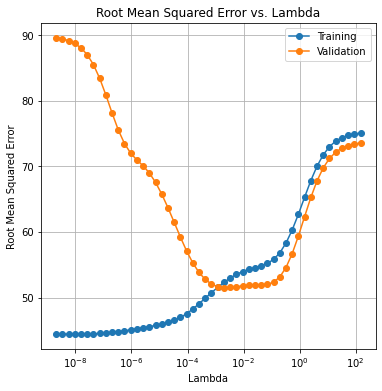

In [130]:
import sklearn.linear_model
lambds = np.exp(np.linspace(-20,5,50))
training_rmse = []
validation_rmse = []

for lambd in lambds:
    reg = sklearn.linear_model.Ridge(alpha=lambd)
    reg.fit(X_train, Y_train) # train on training data
    
    output = reg.predict(X_train) # test on training data???
    error = np.sqrt(np.mean((Y_train-output)**2)) # compute root mean squared error
    training_rmse.append(error)
    
    output = reg.predict(X_validation) # test on validation data
    error = np.sqrt(np.mean((Y_validation-output)**2)) # compute root mean squared error
    validation_rmse.append(error)

# plotting rmse vs lambda
plt.figure(figsize=(6,6))
plt.semilogx(lambds, training_rmse, label='Training', marker='o', linestyle='-')
plt.semilogx(lambds, validation_rmse, label='Validation', marker='o', linestyle='-')

# labels
plt.xlabel('Lambda')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error vs. Lambda')
plt.legend()

plt.grid(True)
plt.show()

In [237]:
lambd = np.exp(-3)
reg = sklearn.linear_model.Ridge(alpha=lambd)
reg.fit(X_train, Y_train) # train on training data
output = reg.predict(X_test) # test on testing data???
error = np.sqrt(np.mean((Y_test-output)**2)) # compute root mean squared error

print(f"Regularization: {np.exp(-3)}")
print(f"Root mean squared error (testing): {error}")

Regularization: 0.049787068367863944
Root mean squared error (testing): 53.6929431034061


**d) [1 mark]** Increase the degree of polynomials used.  Try values up to at least 5.  Compute the same plots as in part a).  How does this change the plots?  Why does this happen?  What happens if you increase the degree up to even larger values like 10 or 20?  Why?

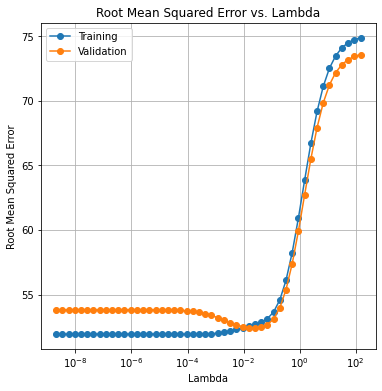

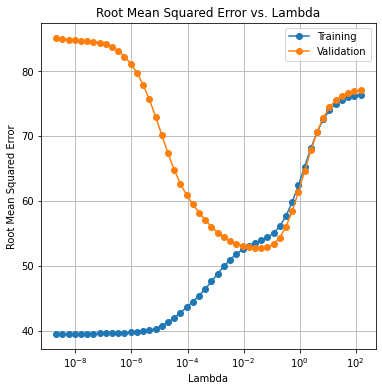

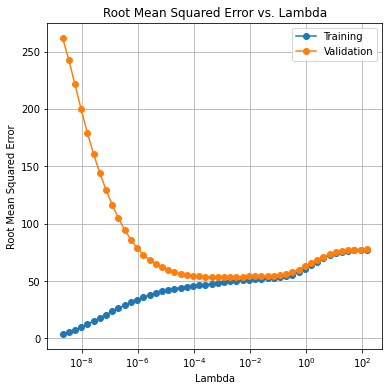

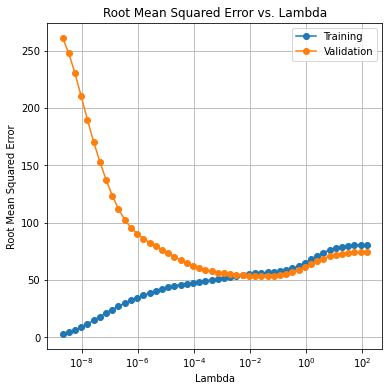

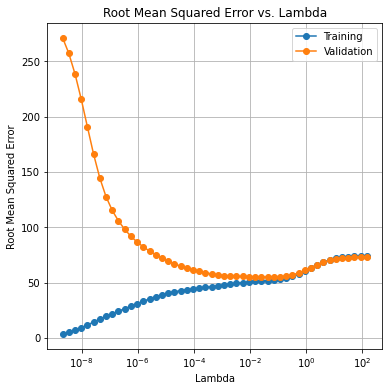

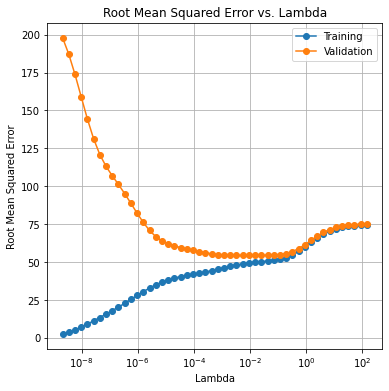

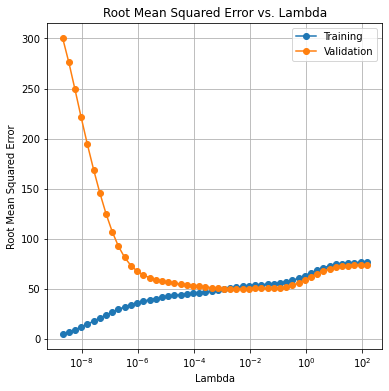

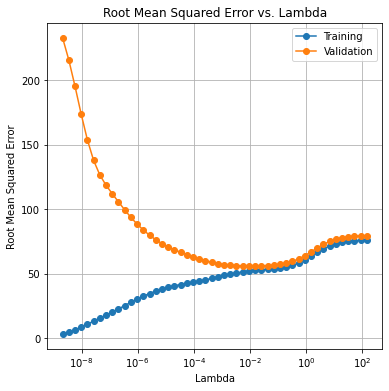

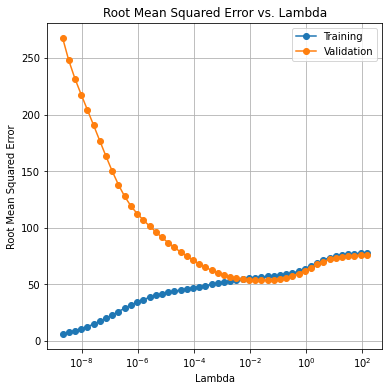

In [136]:
for d in range(1, 10):
    X = sklearn.preprocessing.PolynomialFeatures(degree=d).fit_transform(diabetes.data)
    Y = diabetes.target

    # split into testing and training
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
        X, Y, test_size=1/3, shuffle=True
    )

    # split training into training and validation
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(
        X_train, Y_train, test_size=1/2, shuffle=True
    )

    lambds = np.exp(np.linspace(-20,5,50))
    training_rmse = []
    validation_rmse = []

    for lambd in lambds:
        reg = sklearn.linear_model.Ridge(alpha=lambd)
        reg.fit(X_train, Y_train) # train on training data

        output = reg.predict(X_train) # test on training data???
        error = np.sqrt(np.mean((Y_train-output)**2)) # compute root mean squared error
        training_rmse.append(error)

        output = reg.predict(X_validation) # test on validation data
        error = np.sqrt(np.mean((Y_validation-output)**2)) # compute root mean squared error
        validation_rmse.append(error)

    # plotting rmse vs lambda
    plt.figure(figsize=(6,6))
    plt.semilogx(lambds, training_rmse, label='Training', marker='o', linestyle='-')
    plt.semilogx(lambds, validation_rmse, label='Validation', marker='o', linestyle='-')

    # labels
    plt.xlabel('Lambda')
    plt.ylabel('Root Mean Squared Error')
    plt.title('Root Mean Squared Error vs. Lambda')
    plt.legend()

    plt.grid(True)
    plt.show()

As the polynomial degree increases up to 5, the RMSE decreases for a wide range of regularization values, suggesting that increases the complexity of the model helps to fit the training data better, but renders the model prone to overfitting.

As the degree increases up to 10 and even 20, the RMSE starts to stabilize at large regularization values for a range of degrees. Also, the validation RMSE at low regularization values is extremely high for high degree polynomials, suggesting that increasing the complexity of the model requires very strong regularization to control overfitting.